# 1. Business Problem
## 1.1 Problem Context

Our client is a large community of tech enthusiasts called Kickstarter.

- This community aids people in bringing out creative projects.
- Till now, more than 3 billion dollars have been contributed by the members in fuelling creative projects.
- It works on All or Nothing basis i.e if a project dosen't meet its goal, the project owner gets nothing.

## 1.2 Problem Statement

- Recently, Kickstarter released its public data repository to allow researchers and enthusiasts like us to help them solve a problem.
- The problem is regarding whether a project will get successfully funded or not.
- If we are able to build such a model that predicts whether a project will be funded as per its requirements, it can help the community to determine beforehand, its successful completion.

## 1.3 Business Objectives and Constraints

-  Deliverable: Trained model file.
-  Ouput Probabilities along with the prediction.
-  Model interprtability is very important
-  No latency constraints.

# 2. Machine Learning Problem

## 2.1 Data Overview
For this project:

1. The train dataset and the test datset has 108129 observations and 63465 obervations respectively.
2. The train data consists of sample projects from the May 2009 to May 2015. The test data consists of projects from June 2015 to March 2017.
3. Each observation in the train and test sets refers to a project's description and status.

**Target Variable**
- 'final_status' - whether the project got successfully funded (target variable – 1,0)

**Features of the data:**

Unique characteristics

* project_id - unique id of project
* name - name of the project
* desc - description of project
* goal - the goal (amount) required for the project
* keywords - keywords which describe project

General project specifications 

* disable communication - whether the project authors has disabled communication option with people donating to the project
* country - country of project author
* currency - currency in which goal (amount) is required
* deadline - till this date the goal must be achieved (in unix timeformat)
* backers_count - no. of people who backed the project

Project state information

* state_changed_at - at this time the project status changed. Status could be successful, failed, suspended, cancelled etc. (in unix timeformat)
* created_at - at this time the project was posted on the website(in unix timeformat)
* launched_at - at this time the project went live on the website(in unix timeformat)
* final_status - 	whether the project got successfully funded (target variable – 1,0)

## 2.2 Mapping business problem to ML problem

### 2.2.1 Type of Machine Learning Problem

It is a binary classification problem, where given the above set of features, we need to predict if a given project will be successfully funded or not.

### 2.2.2 Evaluation Metric (KPI)

Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model
* **ROC-AUC** - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (**Note:** ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

Import the libraries

In [36]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cross_validation import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [37]:
df = pd.read_csv('train.csv') #Loading data

In [38]:
df.shape #shape of the data

(108129, 14)

In [39]:
df.columns #columns present in dataset

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [40]:
pd.set_option('display.max_columns', 15)
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


## Exploratory Data Analysis

Filtering categorical data

In [41]:
df.dtypes[df.dtypes=='object']

project_id    object
name          object
desc          object
keywords      object
country       object
currency      object
dtype: object

## Distribution of Numerical Features

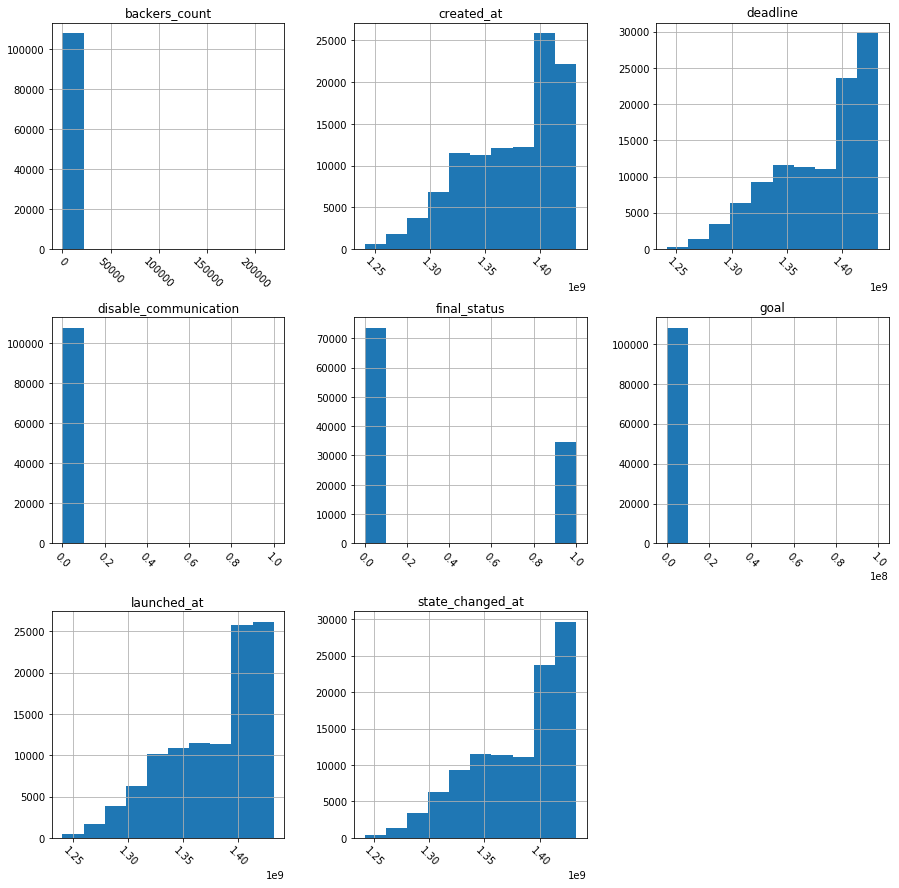

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

** Observations**:
Consider Histogram for Final status:
* More than 60000 projects have final status 0
* ALmost 30000 to 35000 projects have final status 1 i.e 1/3rd of the projects are getting successful 

Disable_communication is almost 0(False) for all the projects


In [8]:
df.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


** Observations**:
* It seems like there are no missing values in numerical featurs
* In backers_count, mean value is too smaller than max value so there can be possibility of presence of outlier

## Distribution of categorical data

In [9]:
df.describe(include=['object'])

,project_id,name,desc,keywords,country,currency
count,108129,108128,108121,108129,108129,108129
unique,108129,107840,107378,108129,11,9
top,kkst559621753,New EP/Music Development,The Decentralized Dance Party was founded on t...,alias-ruby-blade-a-story-of-love-and-revolution,US,USD
freq,1,7,20,1,92033,92033


**Observations**:
* 'name', 'desc' have few missing values
* There are 11 unique classes for country nd 9 unique classes for currency
* project_id is unique feature so all the classes are unique and it has frequency 1

## Bar plots for categorical Features

We will only plot the bar plots for country and currency as it has less unique values for other features there is no point in plotting the bar plots as they contains unique values almost same to their count

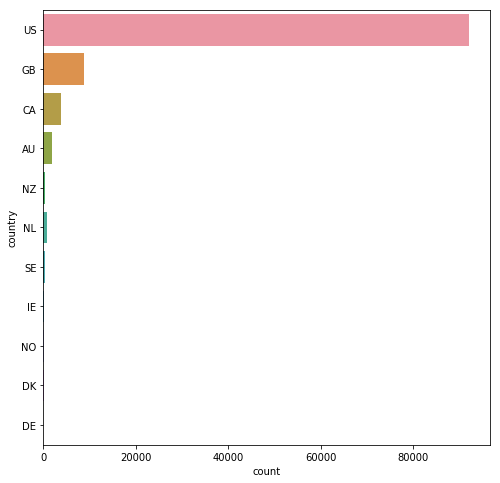

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(y='country', data=df)

* We can see only few classes like 'US', 'GB', 'CA', 'AU' have consiiderable observation all the other remaining classes are sparse classes

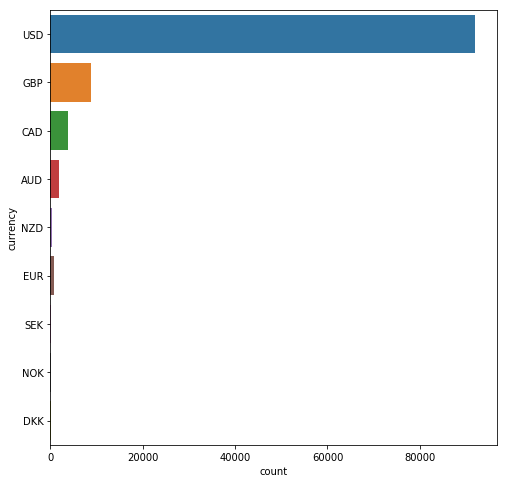

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(y='currency', data=df)

* Similarly 'NZD', 'SEK', 'NDK' and 'DKK' are sparse classes here as it has very few observations
* Also if we looked at both the plots they are almost same as the currency is the currency of the country

#### 2-D Scatter Plot

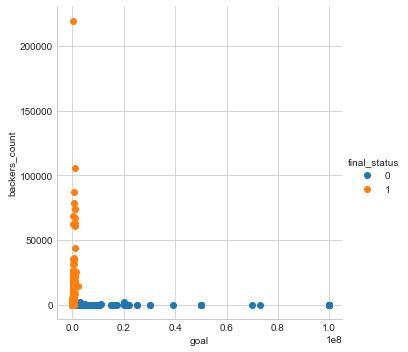

In [12]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'final_status', size = 5).map(plt.scatter, 'goal', 'backers_count').add_legend()

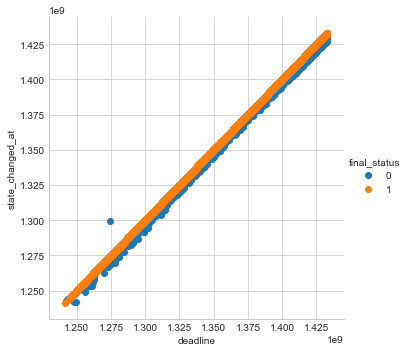

In [13]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'final_status', size = 5).map(plt.scatter, 'deadline', 'state_changed_at').add_legend()

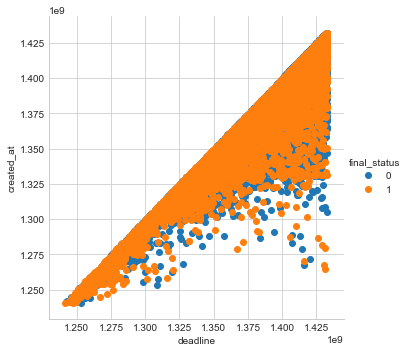

In [14]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'final_status', size = 5).map(plt.scatter, 'deadline', 'created_at').add_legend()

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [15]:
df.corr()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
goal,1.000000,-0.000602,0.021468,0.021179,0.020937,0.020859,0.008733,-0.018984
disable_communication,-0.000602,1.000000,0.046417,0.043782,0.048588,0.046166,-0.003294,-0.037517
deadline,0.021468,0.046417,1.000000,0.999930,0.984109,0.999674,0.005281,-0.123052
state_changed_at,0.021179,0.043782,0.999930,1.000000,0.984029,0.999641,0.005501,-0.121628
created_at,0.020937,0.048588,0.984109,0.984029,1.000000,0.984558,0.001053,-0.126394
launched_at,0.020859,0.046166,0.999674,0.999641,0.984558,1.000000,0.005357,-0.119916
backers_count,0.008733,-0.003294,0.005281,0.005501,0.001053,0.005357,1.000000,0.116764
final_status,-0.018984,-0.037517,-0.123052,-0.121628,-0.126394,-0.119916,0.116764,1.000000


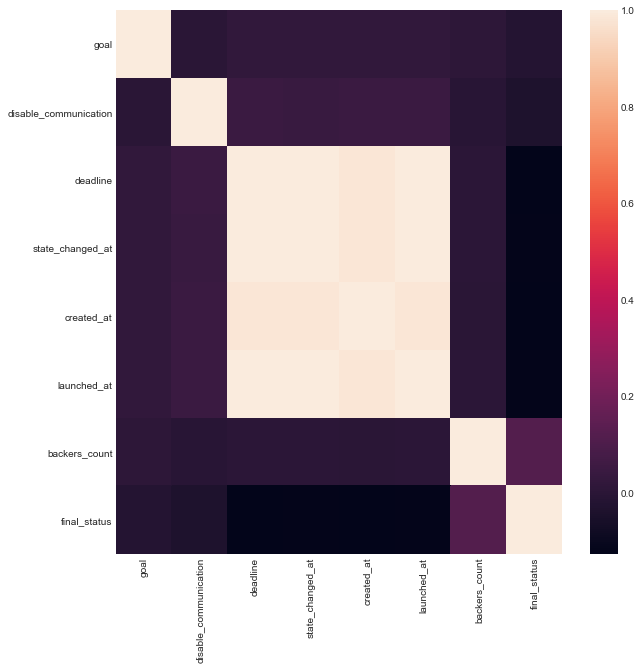

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

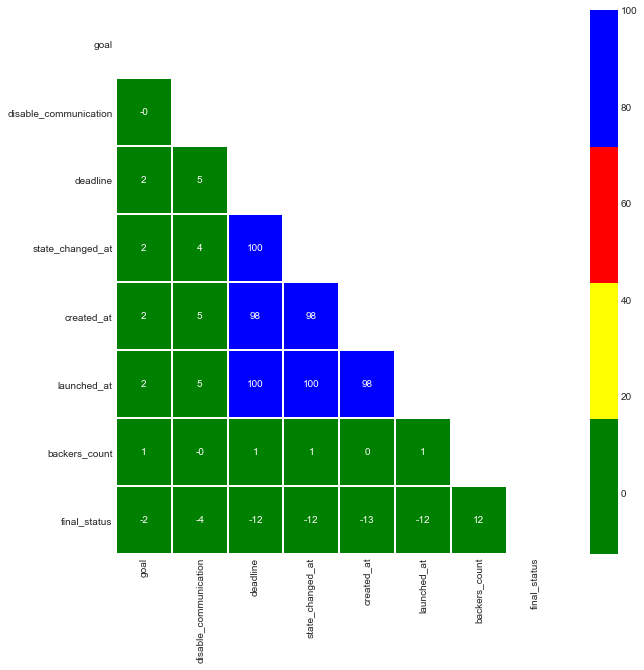

In [29]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [42]:
df = df.drop_duplicates()
print( df.shape )

(108129, 14)


It seems there are no duplicates

## Removing Outliers

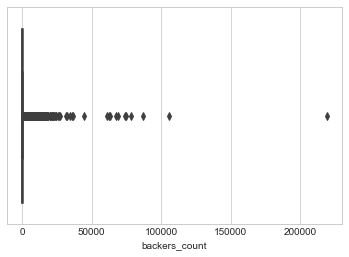

In [17]:
sns.boxplot(df.backers_count)

In [64]:
df.backers_count.sort_values(ascending=False).head()

92361    219382
62444    105857
17099     87142
97967     78471
36809     74405
Name: backers_count, dtype: int64

'backers_count' has only one value extremely high(outlier) so let's remove it

In [43]:
df = df[df.backers_count <=200000 ]
df.shape

(108128, 14)

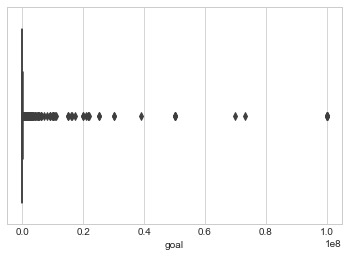

In [63]:
sns.boxplot(df.goal)

In [66]:
df.goal.sort_values(ascending=False).head()

65916     100000000.0
94283     100000000.0
76555     100000000.0
100553    100000000.0
93957     100000000.0
Name: goal, dtype: float64

It seems 'goal' doesn't have outlier

## Display missing categorical data

In [44]:
df.select_dtypes(include=['object']).isnull().sum()

project_id    0
name          1
desc          8
keywords      0
country       0
currency      0
dtype: int64

In [37]:
df[df.isnull().any(axis=1)] #display rows containing missing values

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
13244,kkst881978749,NaN,NaN,35000.0,you-have-the-power-to-put-our-film-in-theaters,False,US,USD,1323061140,1323061142,1320612894,1320620155,5,0
19276,kkst716015319,N/A (Canceled),NaN,50000.0,the-lineup-0,False,US,USD,1335042707,1331581327,1331063276,1331158307,0,0
67393,kkst493162275,OF Press - A WordPress Theme and Site Builder ...,NaN,5000.0,of-press,False,US,USD,1407707123,1406761089,1405032789,1405115123,4,0
67632,kkst2143840399,Blue Heart - Natural Remedies (Canceled),NaN,1500.0,blue-heart-natural-remedies,False,US,USD,1407811896,1407024116,1404522581,1405219896,3,0
68852,kkst810592516,Vending Machine (Canceled),NaN,100.0,online-sticker-book-vending-machine,False,US,USD,1408334400,1408333920,1406991938,1407441222,2,0
75158,kkst511508475,TEST (Canceled),NaN,1000001.0,caiman-connected-the-ultimate-mobile-device-ac...,False,US,USD,1411793329,1411694770,1410013102,1410583729,2,0
98721,kkst580040638,N/A (Canceled),NaN,100000.0,international-festival-of-language-and-culture,False,US,USD,1427901540,1424449267,1424103554,1424210815,0,0
104401,kkst93676199,None (Canceled),NaN,500.0,2-songs-seduce-your-dreams-pop-and-latin-kizom...,False,US,USD,1430928908,1430446941,1429640876,1430064908,0,0


As the name and description features have missing data we need to drop the rows as there is no point in keeping the data(project) without name or description.

In [45]:
df=df.dropna(how='any')  

In [46]:
df.select_dtypes(include=['object']).isnull().sum()

project_id    0
name          0
desc          0
keywords      0
country       0
currency      0
dtype: int64

Now there are no  missing values 

Sort the values based on time when the project is launched

In [47]:
df = df.sort_values('launched_at') 

In [48]:
df=df.reset_index(drop=True)

In [49]:
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,False,US,USD,1247554799,1247554830,1240637870,1240673781,25,1
2,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
3,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
4,kkst1261713500,Crossword Puzzles!,I create crosswords and other puzzles. These h...,1500.0,crossword-puzzles,False,US,USD,1246354320,1246355121,1240997554,1241005923,163,1


## Feature Engineering

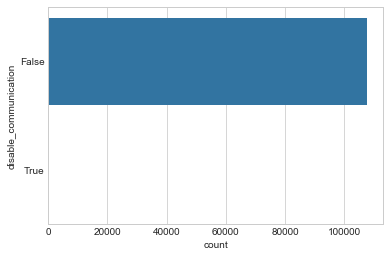

In [43]:
sns.countplot(y='disable_communication', data=df)

As we can see, almost all the values are 'False' for above feature,there is no point to keep this feature, so let's drop it

In [17]:
df = df.drop(['disable_communication'], axis=1)

* If we look at the bar plots of Country and currency, both are same as the currency is the currency of the country so let's remove one of this features

In [18]:
df = df.drop(['country'], axis=1)

As all the projects has its goal amount in different currencies let's replace all the currencies in terms of USD

In [19]:
df.currency.replace(['USD'],1.0,inplace=True)
df.currency.replace(['GBP'],1.33,inplace=True)
df.currency.replace(['CAD'],0.76,inplace=True)
df.currency.replace(['AUD'],0.75,inplace=True)
df.currency.replace(['EUR'],1.16,inplace=True)
df.currency.replace(['NZD'],0.7,inplace=True)
df.currency.replace(['SEK'],0.11,inplace=True)
df.currency.replace(['DKK'],0.16,inplace=True)
df.currency.replace(['NOK'],0.12,inplace=True)

Let's create new feature amount by using currency and goal to make all goal value in USD currency format

In [20]:
df['amount']= df['goal']*df['currency']

Before finalizing a data lets convert unix time to dates

In [21]:
df['deadline']=pd.to_datetime(df['deadline'], unit='s').dt.date
df['state_changed_at']=pd.to_datetime(df['state_changed_at'], unit='s').dt.date
df['created_at']=pd.to_datetime(df['created_at'], unit='s').dt.date
df['launched_at']=pd.to_datetime(df['launched_at'], unit='s').dt.date

In [22]:
df.head(2)

,project_id,name,desc,goal,keywords,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,amount
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,2009-05-03,2009-04-24,2009-04-24,3,1,20.0
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,2009-07-14,2009-04-25,2009-04-25,25,1,99.0


Creating a new feature which gives the time required to launch the project after it is created

In [23]:
# Create a time_to_achieve feature
df['time_to_achieve'] = df.launched_at - df.created_at

Let's create a new feature which displays how early the project is launched before the deadline.

In [24]:
df['completion_before_deadline'] = df.deadline - df.launched_at

Let's create one more feature which gives the number of days in which the status of the project changes after it is launched

In [25]:
df['time_to_change_the_status'] = df.state_changed_at - df.launched_at

In [26]:
df.head()

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,...,2009-04-24,3,1,20.0,0 days,9 days,9 days
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,...,2009-04-25,25,1,99.0,0 days,80 days,80 days
2,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,1.0,2009-05-29,...,2009-04-29,18,1,500.0,0 days,30 days,30 days
3,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,1.0,2009-05-15,...,2009-04-29,2,0,300.0,1 days,16 days,17 days
4,kkst1261713500,Crossword Puzzles!,I create crosswords and other puzzles. These h...,1500.0,crossword-puzzles,1.0,2009-06-30,...,2009-04-29,163,1,1500.0,0 days,62 days,62 days


Removing 'days' word from time_to_achieve

In [27]:
df['time_to_achieve']= df['time_to_achieve'].map(lambda x: str(x)[:-13])
df.head(2)

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,...,2009-04-24,3,1,20.0,0,9 days,9 days
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,...,2009-04-25,25,1,99.0,0,80 days,80 days


converting 'time_to_achieve'(string feature) to numerical value

In [28]:
df['time_to_achieve']= pd.to_numeric(df.time_to_achieve, errors='coerce')

Removing a word 'days' from 'completion_before_deadline'

In [29]:
df['completion_before_deadline']=df['completion_before_deadline'].map(lambda x: str(x)[0:2])
df.head()

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,...,2009-04-24,3,1,20.0,0,9,9 days
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,...,2009-04-25,25,1,99.0,0,80,80 days
2,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,1.0,2009-05-29,...,2009-04-29,18,1,500.0,0,30,30 days
3,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,1.0,2009-05-15,...,2009-04-29,2,0,300.0,1,16,17 days
4,kkst1261713500,Crossword Puzzles!,I create crosswords and other puzzles. These h...,1500.0,crossword-puzzles,1.0,2009-06-30,...,2009-04-29,163,1,1500.0,0,62,62 days


converting numbers from string to numeric value

In [30]:
df['completion_before_deadline']= pd.to_numeric(df.completion_before_deadline, errors='coerce')

In [31]:
df[df['completion_before_deadline']<0]

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status


In [32]:
df['time_to_change_the_status']= df['time_to_change_the_status'].map(lambda x: str(x)[0:2])
df.head(2)

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,...,2009-04-24,3,1,20.0,0,9,9
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,...,2009-04-25,25,1,99.0,0,80,80


In [33]:
df['time_to_change_the_status']= pd.to_numeric(df.time_to_change_the_status, errors='coerce')

In [34]:
df.head()

,project_id,name,desc,goal,keywords,currency,deadline,...,launched_at,backers_count,final_status,amount,time_to_achieve,completion_before_deadline,time_to_change_the_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,1.0,2009-05-03,...,2009-04-24,3,1,20.0,0,9,9
1,kkst1879233905,Offline Wikipedia iPhone app,This is a project to create a free iPhone app ...,99.0,offline-wikipedia-iphone-app,1.0,2009-07-14,...,2009-04-25,25,1,99.0,0,80,80
2,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,1.0,2009-05-29,...,2009-04-29,18,1,500.0,0,30,30
3,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,1.0,2009-05-15,...,2009-04-29,2,0,300.0,1,16,17
4,kkst1261713500,Crossword Puzzles!,I create crosswords and other puzzles. These h...,1500.0,crossword-puzzles,1.0,2009-06-30,...,2009-04-29,163,1,1500.0,0,62,62


## Removing unused data

Remove 'created_at', 'launched_at','state_changed_at','deadline' as we have created other features using this features

In [46]:
df = df.drop(['created_at', 'launched_at','state_changed_at','deadline'], axis=1)

Now we have removed 'created_at','launched_at','disable_communication' and added new feature 'time_to_achieve'.

In [47]:
df=df.drop(['goal','currency'],axis=1)

If we looked at name, keywords and description column, they are not very useful in determining whether the project will get funded or not

In [48]:
df = df.drop(['name', 'keywords', 'desc'], axis=1)

We don't need project_id so let's drop it

In [49]:
df=df.drop(['project_id'],axis=1)

In [50]:
df.head()

,backers_count,final_status,amount,time_to_achieve,time_to_change_the_status,completion_before_deadline
0,3,1,20.0,0,9,9
1,25,1,99.0,0,80,80
2,18,1,500.0,0,30,30
3,2,0,300.0,1,17,16
4,163,1,1500.0,0,62,62


Save the filtered data in new csv

In [51]:
df.to_csv('FilteredTrain.csv', index=None, encoding='utf-8')

## Machine Learning Models

### Data Preparation

In [2]:
df = pd.read_csv('FilteredTrain.csv')

In [3]:
df.head(2)

,backers_count,final_status,amount,time_to_achieve,time_to_change_the_status,completion_before_deadline
0,3,1,20.0,0,9,9
1,25,1,99.0,0,80,80


In [4]:
df.isnull().values.any()

False

In [5]:
df.shape

(108120, 6)

In [6]:
# Create separate object for target variable
y = df.final_status

# Create separate object for input features
X = df.drop('final_status', axis=1)

In [7]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.final_status)



In [8]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(86496, 5) (21624, 5) (86496,) (21624,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [9]:
train_mean = X_train.mean()
train_std = X_train.std()

In [10]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [11]:
## Check for mean and std dev.
X_train.describe()

,backers_count,amount,time_to_achieve,time_to_change_the_status,completion_before_deadline
count,8.649600e+04,8.649600e+04,8.649600e+04,8.649600e+04,8.649600e+04
mean,-5.177793e-16,7.873000e-19,-1.798324e-17,2.918160e-18,3.878362e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.193123e-01,-3.806742e-02,-4.324543e-01,-2.425751e+00,-2.559324e+00
25%,-1.173720e-01,-3.603576e-02,-3.980366e-01,-2.263305e-01,-3.236934e-01
50%,-1.028200e-01,-3.297437e-02,-3.177288e-01,-2.263305e-01,-3.236934e-01
75%,-5.625334e-02,-2.482427e-02,-6.533275e-02,2.135537e-01,2.159415e-01
max,1.025766e+02,1.018382e+02,2.141128e+01,4.319140e+00,4.455930e+00


In [12]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [13]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,backers_count,amount,time_to_achieve,time_to_change_the_status,completion_before_deadline
count,21624.000000,21624.000000,21624.000000,21624.000000,21624.000000
mean,-0.007214,-0.011403,0.002438,-0.003306,-0.005067
std,0.651459,0.449266,1.000418,0.995316,0.996701
min,-0.119312,-0.038068,-0.432454,-2.425751,-2.559324
25%,-0.117372,-0.036036,-0.398037,-0.226330,-0.323693
50%,-0.101850,-0.032974,-0.306256,-0.226330,-0.323693
75%,-0.057223,-0.024824,-0.053860,0.140240,0.138851
max,34.208050,50.900076,21.009737,4.319140,4.455930


##  Model-1 Logistic Regression

In [64]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [65]:
model.best_estimator_

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [67]:
## Predict Test set results
y_pred = model.predict(X_test)

In [68]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [69]:
# Display first 10 predictions
y_pred_proba[:10]

array([  1.86872115e-01,   3.21286208e-07,   6.78968962e-02,
         6.42712817e-02,   1.62102007e-01,   3.58482586e-01,
         6.95697847e-01,   1.45344210e-01,   4.23737996e-01,
         1.90278657e-01])

In [70]:
i=213  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 213, actual class = 0, precited class = 0, predicted probability = 0.32020398793045307


In [71]:
confusion_matrix(y_test, y_pred).T

array([[13957,  3063],
       [  755,  3849]], dtype=int64)

In [72]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

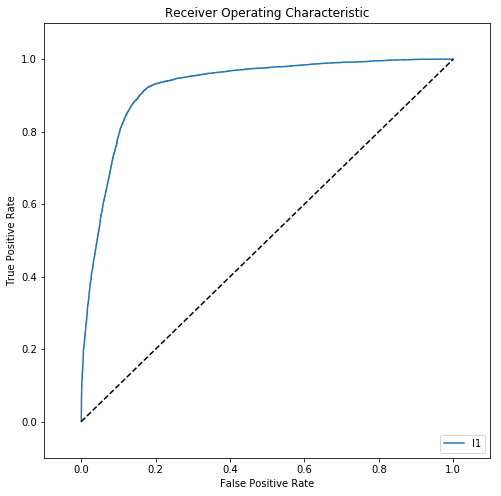

In [73]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.756906623372


In [75]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.923805807027


#### Feature Importance

In [76]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=10000, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
amount
time_to_change_the_status
completion_before_deadline
backers_count
time_to_achieve


## Model-2 Random Forest

In [78]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [79]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
y_train_pred = model.predict(X_train)

In [81]:
y_pred = model.predict(X_test)

In [82]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [83]:
# Display first 10 predictions
y_pred_proba[:10]

array([  3.98045918e-02,   2.53899638e-01,   1.47741072e-03,
         1.55884460e-04,   1.69312169e-03,   8.38360687e-01,
         9.60450097e-01,   5.20879911e-04,   8.62548400e-01,
         2.46913580e-04])

In [84]:
confusion_matrix(y_test, y_pred).T

array([[13109,  1164],
       [ 1603,  5748]], dtype=int64)

In [85]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

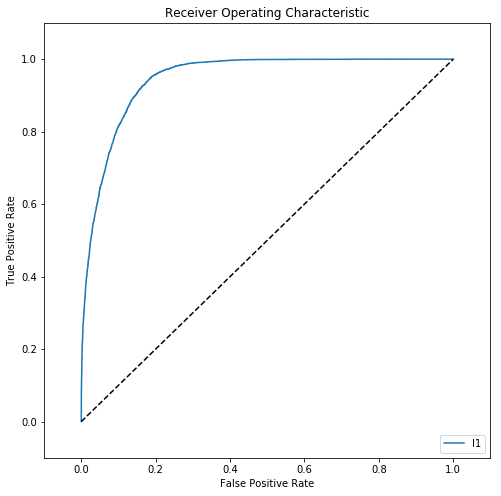

In [86]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.92031173885830164

In [88]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.94663782569


#### Feature Importance

In [89]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
backers_count
amount
time_to_achieve
completion_before_deadline
time_to_change_the_status


##  Model-3 XGBoost

In [91]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [92]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [93]:
y_train_pred = model.predict(X_train)

In [94]:
y_pred = model.predict(X_test)

In [95]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [96]:
# Display first 10 predictions
y_pred_proba[:10]

array([  4.88606580e-02,   2.05810457e-01,   2.79078668e-04,
         1.85588317e-04,   6.62337849e-03,   7.50008106e-01,
         9.39036906e-01,   5.77500396e-05,   8.99629116e-01,
         8.80584703e-05], dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [97]:
confusion_matrix(y_test, y_pred).T

array([[13138,  1069],
       [ 1574,  5843]], dtype=int64)

In [98]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

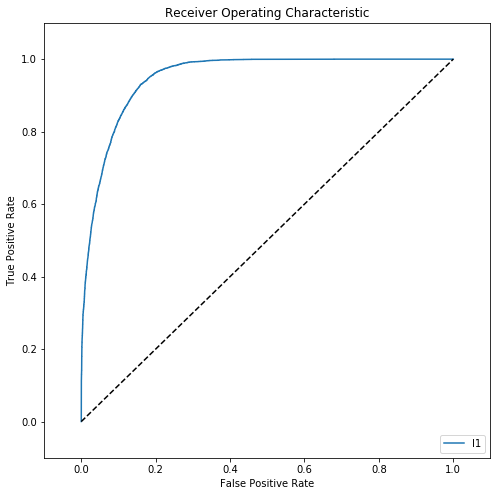

In [99]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.87482195774613314

In [101]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.950596087039


#### Feature Importance

In [102]:
model = XGBClassifier(max_depth=4,learning_rate=0.05,n_estimators=500, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [103]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

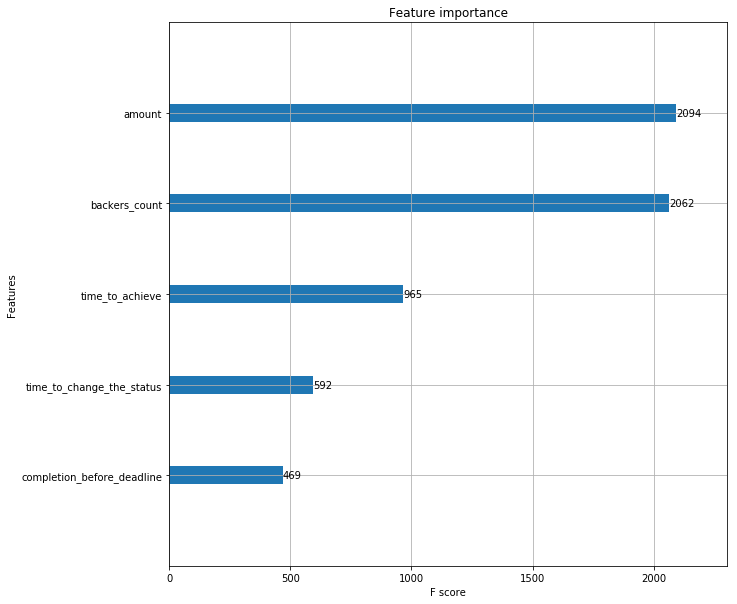

In [104]:
my_plot_importance(model, (10,10))

## Model-4 KNN

In [105]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 11.


In [106]:
MSE.index(min(MSE))

5

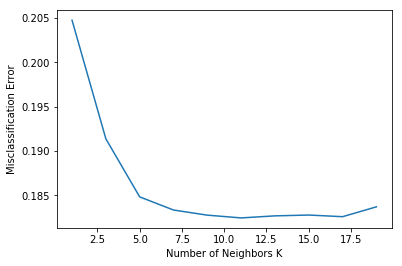

In [107]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [108]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [109]:
y_pred = classifier.predict(X_test)


In [110]:
y_train_pred = classifier.predict(X_train)

In [111]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

82.107843137254903

In [112]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[12586,  1743],
       [ 2126,  5169]], dtype=int64)

In [113]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [114]:
# Display first 10 predictions
y_pred_proba[:10]

array([ 0.        ,  0.09090909,  0.        ,  0.        ,  0.09090909,
        0.63636364,  0.63636364,  0.        ,  0.63636364,  0.        ])

In [115]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

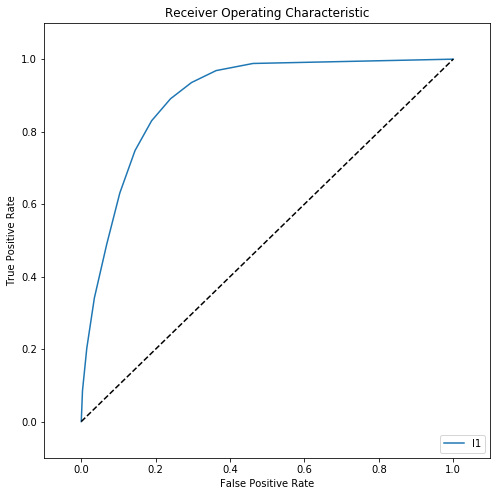

In [116]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.83555807971383911

In [118]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.894584215235


## Model-5 Descision Trees

In [119]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [120]:
model.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
y_train_pred = model.predict(X_train)

In [122]:
y_pred = model.predict(X_test)

In [123]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [124]:
y_pred_proba[:10]

array([  7.93650794e-02,   1.90789474e-01,   2.86158123e-04,
         2.86158123e-04,   1.48754184e-03,   7.49279539e-01,
         8.38446788e-01,   2.86158123e-04,   8.98113208e-01,
         2.86158123e-04])

In [125]:
confusion_matrix(y_test, y_pred).T

array([[13155,  1159],
       [ 1557,  5753]], dtype=int64)

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

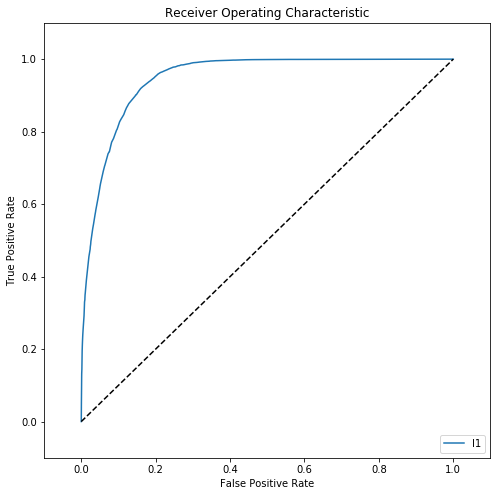

In [127]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.86722599960916258

In [129]:
print(auc(fpr, tpr))

0.946734055045


#### Feature Importance

In [130]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
backers_count
amount
completion_before_deadline
time_to_change_the_status
time_to_achieve


## Model-6 SVC

In [132]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [133]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
svc_param_selection(X_train,y_train,5)

{'C': 10, 'gamma': 1}

In [135]:
###### Building the model again with the best hyperparameters
model = SVC(C=10, gamma=1)
model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [137]:
## Predict Test results
y_pred = model.predict(X_test)

In [138]:
confusion_matrix(y_test, y_pred).T

array([[13465,  2448],
       [ 1247,  4464]], dtype=int64)

In [139]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

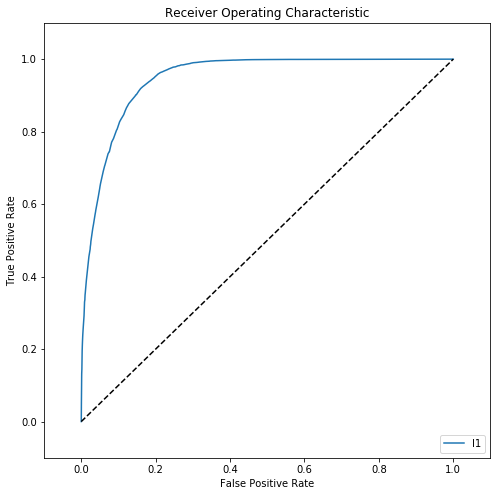

In [140]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [141]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7846742820958702

In [142]:
print(auc(fpr, tpr))

0.946734055045


#### Unfortunately getting feature importance from RBF SVM is non trivial

## Compare all models

![title](Results.png)

** If we compare all the above models, Xgboost gives best auc for test but the difference between train and test is more which means model is overfitting.  
Now , If we consider Random forest classifier, the test result is almost similar to xgboost and train result is better than other models also the model doesn't overfit.So, Random Forest is the winning model.**

##  Save the winning model to disk

In [14]:
win_model = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=4)
win_model.fit(X_train, y_train)
with open('funding_projects.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'funding_projects.pkl') 